In [7]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
%matplotlib inline

In [28]:
url='http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/2004050300_eta_211.nc'
nc=netCDF4.Dataset(url)
print nc.variables.keys()
date=nc.variables['valtime']
print date[:]

[u'reftime', u'valtime', u'datetime', u'valtime_offset', u'model_id', u'nav_model', u'grid_type_code', u'grid_type', u'grid_name', u'grid_center', u'grid_number', u'x_dim', u'y_dim', u'Nx', u'Ny', u'La1', u'Lo1', u'Lov', u'Dx', u'Dy', u'ProjFlag', u'ResCompFlag', u'Z_sfc']
[ 102840.]


In [9]:
print nc.variables['grid_number'][:]

[[255]]


In [10]:
Lo1=nc.variables['Lo1'][:]
La1=nc.variables['La1'][:]
Nx=nc.variables['Nx'][:]
Ny=nc.variables['Ny'][:]
Dx=nc.variables['Dx'][:]
Dy=nc.variables['Dy'][:]
print Lo1, La1, Nx, Ny, Dx, Dy


[-135.21299744] [ 27.20299911] [135] [95] [ 60000.] [ 60000.]


In [11]:
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
x,y=meshgrid(x,y)
z=nc.variables['Z_sfc'][0,:,:]
print z.shape

(95, 135)


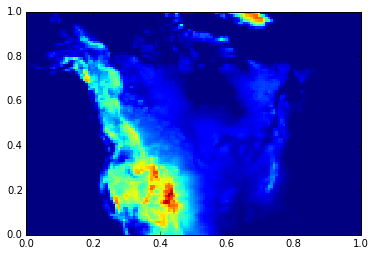

In [12]:
plt.pcolor(x,y,z)

In [9]:
#%pinfo Basemap

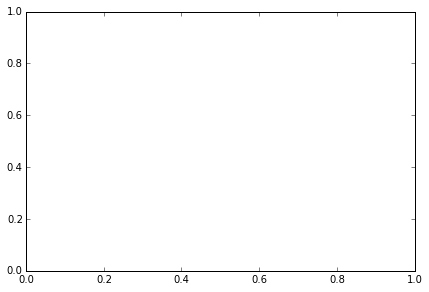

In [18]:
llcrnrlon=-160    # lower-left corner, lon
llcrnrlat=  20    # lower-left corner, lat
urcrnrlon= -60    # upper-right corner, lon
urcrnrlat=  60    # upper-right corner, lat
lon_0   =Lo1      # center of desired map domain (in degrees).
lat_1   =La1      # first standard parallel for lambert conformal

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(llcrnrlon=llcrnrlon,
            llcrnrlat=llcrnrlat, 
            urcrnrlon=urcrnrlon,
            urcrnrlat=urcrnrlat, 
            projection='lcc',
            resolution ='i',
            area_thresh=1000.,
            lat_1=La1,
            lon_0=Lo1)

NameError: name 'date' is not defined

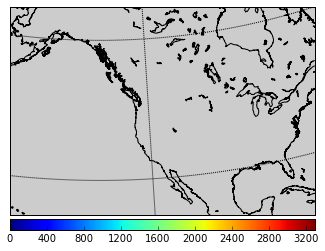

In [19]:
m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
im1 = m.pcolormesh(x,y,z,shading='flat',cmap=plt.cm.jet,latlon=True)

m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
# plt.show()    #  would need this in a python script to flush figure
